## U2_05 & pI_05 :

In [1]:
import numpy as np

U2_05=np.array([0,
0.6,
1.1,
1.5,
1.9,
2.4,
3,
3.5,
3.9,
4.4,
4.9,
5.5,
5.9,
6.5,
7,
7.5,
8,
8.6,
9,
9.6,
10.1,
10.5,
11,
11.5,
12.1,
12.5,
13.1,
13.5,
13.9,
14.5,
15,
15.5,
16.1,
16.5,
16.9,
17.5,
18,
18.5,
19.1,
19.6,
20.1,
20.5,
21,
21.5,
22,
22.6,
23,
23.6,
24,
24.5,
25,
25.5,
26.1,
26.5,
27.1,
27.4,
28,
28.4,
29,
29.6,
30.1,
30.5,
31.3])

In [2]:
pI_05=np.array([
11,
13,
17,
20,
25,
30,
38,
37,
38,
44,
62,
94,
122,
171,
159,
131,
110,
104,
116,
144,
204,
246,
321,
360,
281,
241,
181,
177,
199,
246,
344,
458,
528,
520,
424,
314,
261,
267,
315,
409,
499,
650,
713,
655,
624,
458,
400,
413,
469,
584,
722,
922,
992,
905,
723,
629,
558,
541,
601,
745,
934,
1043,
1045])

In [3]:
U2_10=np.array([0.00,
0.90,
1.90,
2.90,
3.90,
5.00,
6.00,
7.00,
8.00,
8.90,
10.00,
11.00,
12.00,
12.90,
14.00,
15.00,
16.00,
17.00,
17.90,
19.00,
20.00,
20.90,
21.90,
23.00,
23.90,
24.90,
26.00,
27.00,
28.00,
28.90,
29.90,
31.30])

In [4]:
pI_10=np.array([15.60,
24.90,
46.60,
51.20,
57.00,
84.40,
146.10,
191.10,
126.90,
140.20,
229.00,
400.00,
361.00,
232.00,
245.00,
424.00,
656.00,
437.00,
277.00,
299.00,
534.00,
774.00,
687.00,
357.00,
415.00,
625.00,
857.00,
697.00,
464.00,
502.00,
697.00,
846.00])

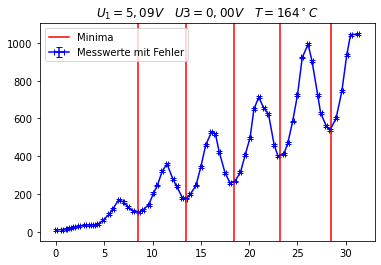

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
np.polyfit

U2_05_err=np.full(len(U2_05),0.1)
pI_05_err=np.full(len(U2_05),5)

plt.errorbar(U2_05, pI_05, xerr=U2_05_err, yerr=pI_05_err,
             color="b", fmt='-', label="Messwerte mit Fehler",capsize=3)
if False:
    deg=10
    [p,V]=np.polyfit(U2_05,pI_05,deg=deg,full=False,w=1/pI_05_err,cov='unscaled')
    print(p)
    p_err = np.sqrt(np.diag(V))
    print(p_err)

    def f(x,a,b,c):
        return a*x*np.sin(x*b)+c*x

    #popt, pcov = curve_fit(f, U2_05, pI_05,sigma=pI_05_err,absolute_sigma=False)

    x = np.linspace(U2_05[0], U2_05[-1],1000)
    y = f(x,popt[0],popt[1],popt[2])
    plt.plot(x, y)

min1=np.array([8.5,8.4,8.5])
min2=np.array([13.4,13.4,13.5])
min3=np.array([18.4,18.4,18.5])
min4=np.array([23.2,23.2,23.2])
min5=np.array([28.5,28.5,28.5])

minimum=np.array([np.array([8.5,8.4,8.5]),
np.array([13.4,13.4,13.5]),
np.array([18.4,18.4,18.5]),
np.array([23.2,23.2,23.2]),
np.array([28.5,28.5,28.5])])

miniavg=np.full(len(minimum),0.)
for i,mini in enumerate(minimum):
    miniavg[i]=np.mean(minimum[i])

plt.axvline(np.average(minimum[0]),color='r',label="Minima")
plt.axvline(np.average(minimum[1]),color='r')
plt.axvline(np.average(minimum[2]),color='r')
plt.axvline(np.average(minimum[3]),color='r')
plt.axvline(np.average(minimum[4]),color='r')

plt.title('$U_1=5,09V\quad U3=0,00V\quad T=164^\circ C$')
plt.legend()
plt.savefig("0.5.png",dpi=300)
plt.show()



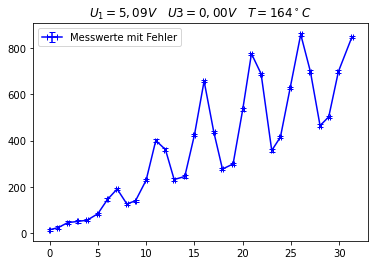

In [13]:
U2_10_err=np.full(len(U2_10),0.1)
pI_10_err=np.full(len(U2_10),5)


plt.errorbar(U2_10, pI_10, xerr=U2_10_err, yerr=pI_10_err,
             color="b", fmt='-', label="Messwerte mit Fehler",capsize=3)

plt.title('$U_1=5,09V\quad U3=0,00V\quad T=164^\circ C$')
plt.legend()
plt.savefig("1.0.png",dpi=300)
plt.show()

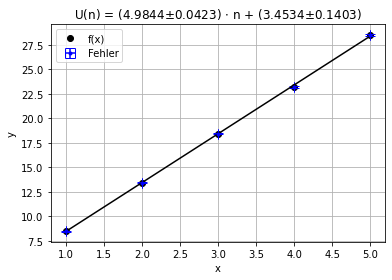

[1.57653765 5.228681  ]


In [16]:
%run ./odr.ipynb
out=zeichnen(fx_title="U(n)",x_title="n",x=np.arange(1,len(miniavg)+1,1),y=miniavg,y_err=np.full(len(miniavg),0.1/np.sqrt(3-1)),speichername="avg",save=True)
print(np.sqrt(np.diag(out.cov_beta)))


In [15]:
def f(x,m,b):
    return m*x+b
popt, pcov = curve_fit(f, xdata=np.arange(1,len(miniavg)+1,1),ydata=miniavg,sigma=np.full(len(miniavg),0.1/np.sqrt(3-1)),absolute_sigma=True)
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

TypeError: leastsq() got an unexpected keyword argument 'fx_title'